### 1. Import Libraries for Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm

%matplotlib inline

#### 2. Load Airbnb Dataset into a Dataframe

In [4]:
airbnb = pd.read_csv('C:/Users/MyPC/Documents/Pascal Insights/Python/Machine Learning/Project/Individual/AB_NYC_2019.csv')

#### 3. Airbnb Data Analysis

In [3]:
#Summary of the dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [4]:
#Exploring the first 10 data entries to further understand the data
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [5]:
print("The number of unique id's in the Airbnb dataset is: {}".format(airbnb['id'].nunique())) #shows us that the id's are completely unique
print("The number of unique listing names in the Airbnb dataset is: {}".format(airbnb['name'].nunique())) #shows us that the name's are not completely unique. Probably reused by repeat hosts
print("The number of unique host id's in the Airbnb dataset is: {}".format(airbnb['host_id'].nunique())) #shows us that there are hosts that have more than one listing in the .

The number of unique id's in the Airbnb dataset is: 48895
The number of unique listing names in the Airbnb dataset is: 47905
The number of unique host id's in the Airbnb dataset is: 37457


In [6]:
#creating array that has all the listing names that occur more than once
#this will be used later
reocurring_listings = np.array(airbnb['name'].value_counts().index.tolist())
listing_filter = np.array(airbnb['name'].value_counts()>1)
reocurring_listings[listing_filter]

array(['Hillside Hotel', 'Home away from home',
       'New york Multi-unit building', 'Brooklyn Apartment',
       'Private Room', 'Loft Suite @ The Box House Hotel', 'Private room',
       'Artsy Private BR in Fort Greene Cumberland',
       'Private room in Brooklyn', 'Cozy Brooklyn Apartment',
       'Beautiful Brooklyn Brownstone', 'Private room in Williamsburg',
       'Harlem Gem', 'Cozy East Village Apartment', 'Cozy Room',
       'Home Away From Home', 'Bushwick Oasis', 'West Village Apartment',
       'New York Apartment', 'Home Sweet Home',
       'Private room in Manhattan',
       'IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS',
       'Private Room in Brooklyn', 'East Village Apartment',
       'Room with a View', 'Harlem Oasis', 'Private Room in Williamsburg',
       'WEST VILLAGE Bohemian flat in neo-Tudor town house', 'Home',
       'Cozy Apartment', 'Cozy home away from home', 'Williamsburg Loft',
       'Upper West Side Studio', 'Cozy Private Room',
       'A CL

In [7]:
#checking for null or blank values
airbnb.isin(airbnb).sum()
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#checking Neighborhoods from Dataset
print('The number of NYC Boroughs utilized in this dataset are {}'.format(airbnb['neighbourhood_group'].nunique()))
print('The names of the {} Boroughs are {}'.format(format(airbnb['neighbourhood_group'].nunique()), airbnb['neighbourhood_group'].unique()))
print('The number of Unique NYC Neighbourhoods in this dataset are {}'.format(airbnb['neighbourhood'].nunique()))


The number of NYC Boroughs utilized in this dataset are 5
The names of the 5 Boroughs are ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
The number of Unique NYC Neighbourhoods in this dataset are 221


In [10]:
#here we are checking to see if there are overlapping lattitudes and longitudes
airbnb['latitude'].value_counts()

40.71813    18
40.68634    13
40.69414    13
40.68444    13
40.71171    12
40.68537    12
40.76189    12
40.76125    12
40.71353    12
40.69054    11
40.70766    11
40.71239    11
40.76106    11
40.72607    11
40.68810    11
40.71910    11
40.68683    11
40.70690    11
40.76769    11
40.69454    11
40.68589    11
40.71923    11
40.71947    10
40.76273    10
40.72434    10
40.71952    10
40.67757    10
40.72085    10
40.76235    10
40.72681    10
            ..
40.64905     1
40.74393     1
40.80559     1
40.54901     1
40.64150     1
40.85181     1
40.64174     1
40.78207     1
40.58790     1
40.72234     1
40.61497     1
40.73701     1
40.82723     1
40.68154     1
40.62250     1
40.67582     1
40.82418     1
40.80035     1
40.65743     1
40.67127     1
40.83161     1
40.69897     1
40.66839     1
40.88515     1
40.87039     1
40.79266     1
40.60531     1
40.81878     1
40.59621     1
40.62066     1
Name: latitude, Length: 19048, dtype: int64

In [11]:
#Here we are checking the frequency distribution of listings per neighourbood within the Five neighbourhood_group(s)
print(airbnb.groupby('neighbourhood_group')['neighbourhood'].value_counts().to_string())

neighbourhood_group  neighbourhood             
Bronx                Kingsbridge                     70
                     Fordham                         63
                     Longwood                        62
                     Mott Haven                      60
                     Concourse                       50
                     Wakefield                       50
                     Port Morris                     46
                     Allerton                        42
                     Williamsbridge                  40
                     Parkchester                     39
                     Concourse Village               32
                     Norwood                         31
                     Claremont Village               28
                     Pelham Gardens                  28
                     Highbridge                      27
                     Belmont                         24
                     Throgs Neck                     24


In [12]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [14]:
#identifying the number of entries with a price listing of 0
airbnb[airbnb['price']==0].count()
#There are no such things as free rooms on airbnb. Prices with a value of 0 are among scenarios that are not beneficial to our analysis or ML models, hence they should be removed since they will obscure the dataset seeing as 0 would be an outlier
#here we remove all listings with a price of 0
airbnb=airbnb[airbnb['price']!=0]

#### 4. Next we will impute the missing values and remove unnecessary columns

In [5]:
#creating copies of dataset for later use
airbnb_dropped = airbnb[['id','host_name','last_review']].copy()
airbnb_visual = pd.DataFrame
airbnb_machine = pd.DataFrame
airbnb_visual=airbnb.copy()
airbnb_machine=airbnb.copy()
airbnb_visual['reviews_per_month'].fillna(0, inplace=True)
airbnb_machine['reviews_per_month'].fillna(0, inplace=True)


#these features we have determined to not be useful
airbnb_visual.drop(['id','host_name','last_review'], axis=1, inplace=True)
airbnb_machine.drop(['id','host_name','last_review'], axis=1, inplace=True)

Engineering some Features

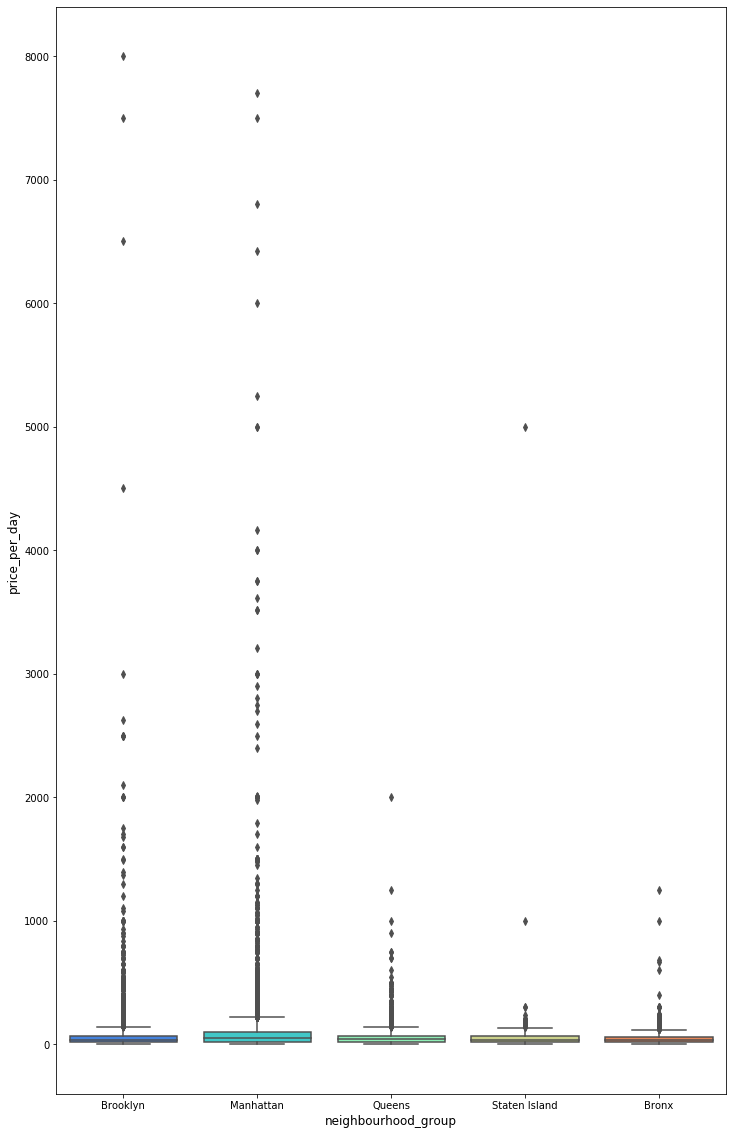

In [59]:
#Some of the price data is not to scale since the minimum nights vary per posting
#We create a new feature that represents the price per day, which should yeild better accuracy
airbnb['price_per_day']=airbnb['price']/airbnb['minimum_nights']
airbnb_visual['price_per_day']=airbnb['price']/airbnb['minimum_nights']
airbnb_machine['price_per_day']=airbnb['price']/airbnb['minimum_nights']
plt.figure(figsize=(12, 20))
sns.boxplot(x='neighbourhood_group',y='price_per_day',data=airbnb,palette='rainbow')

#### 5. Visualization and Continued Analysis

In [64]:
#Selecting Categories to be visualized for word frequency
airbnb_MAN = airbnb[airbnb['neighbourhood_group']=='Manhattan']
airbnb_SI = airbnb[airbnb['neighbourhood_group']=='Staten Island']
airbnb_BK = airbnb[airbnb['neighbourhood_group']=='Brooklyn']
airbnb_QNS = airbnb[airbnb['neighbourhood_group']=='Queens']
airbnb_BX = airbnb[airbnb['neighbourhood_group']=='Bronx']
airbnb_abvaverage = airbnb[airbnb['price_per_day']>airbnb['price_per_day'].mean()].sort_values('price_per_day', ascending=False)
airbnb_blwaverage = airbnb[(airbnb['price_per_day']<airbnb['price_per_day'].mean()) & (airbnb['price_per_day']>0)].sort_values('price_per_day', ascending=True)

airbnb_abvaverage_reviews = airbnb_visual[airbnb_visual['reviews_per_month']>airbnb_visual['reviews_per_month'].mean()].sort_values('reviews_per_month', ascending=False)
airbnb_abvaverage_nreviews = airbnb[airbnb['number_of_reviews']>airbnb['number_of_reviews'].mean()].sort_values('number_of_reviews', ascending=False)
#The least number_of_reviews is not needed because the reason's why people do not review are unreliable
#Properties with a higher number_of_reviews provide more accurate insight than properties with a low number_of_reviews
#the same rationale goes for reviews_per_month


In [17]:
droplist = ['in','to','the','of','&','and', 'for','a']

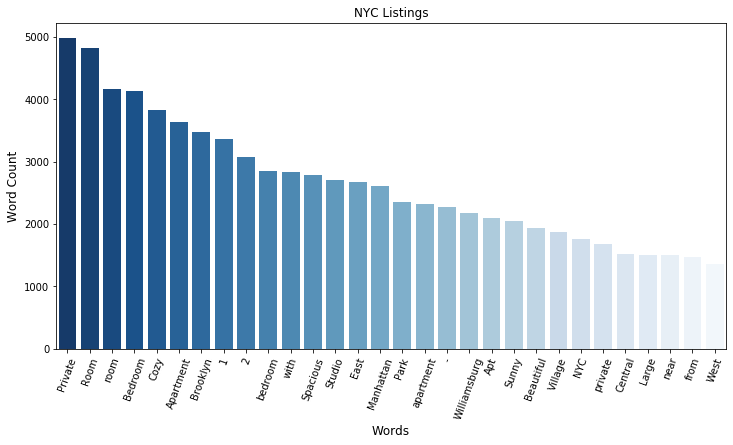

In [45]:
#Word Frequency for all of NYC Airbnb Listings
#The purpose is to have a visualized understanding of which categories are pone to having certain keywords in the listing names
#this will help understand which keywords influence things like location or price

names=airbnb['name'].fillna('No_name').ravel()
names_freq = pd.DataFrame(pd.Series(" ".join(names).split()).value_counts(), columns=['Word Count'])
names_freq.index.name='Words'
names_freq.drop(droplist,axis=0,inplace=True)
#plotting data
names_freq30=names_freq[:30]
plt.figure(figsize=(12, 6))
plt.title('NYC Listings')
sns.barplot(x=names_freq30.index,y='Word Count', data=names_freq30,palette='Blues_r').set_xticklabels(names_freq30.index, rotation=70)
plt.rcParams["axes.labelsize"] = 12



In [ ]:
#IGNORE THIS SECTION
#names=airbnb['name'].fillna('No_name').ravel()
#from collections import Counter
#names_freq = Counter(','.join(names).split()).most_common()
#names_freq

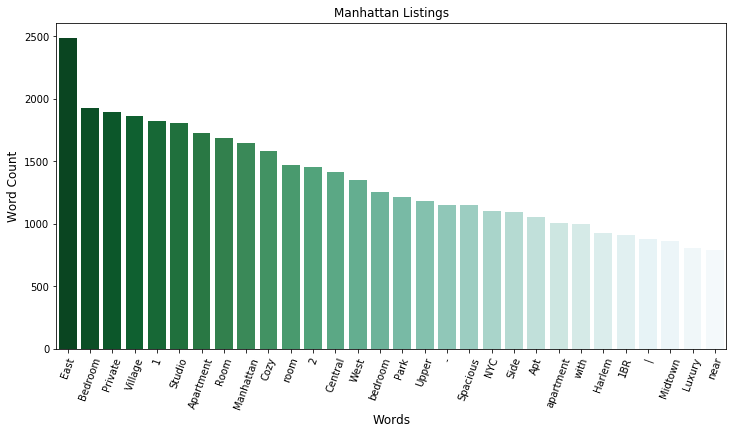

In [51]:
#Word Frequency for Manhattan Airbnb Listings
names=airbnb_MAN['name'].fillna('No_name').ravel()
names_freq_MAN = pd.DataFrame(pd.Series(" ".join(names).split()).value_counts(), columns=['Word Count'])
names_freq_MAN.index.name='Words'
names_freq_MAN.drop(droplist,axis=0,inplace=True)
names_freq_MAN

names_freq30=names_freq_MAN[:30]
plt.figure(figsize=(12, 6))
plt.title('Manhattan Listings')
sns.barplot(x=names_freq30.index,y='Word Count', data=names_freq30,palette='BuGn_r').set_xticklabels(names_freq30.index, rotation=70,)
plt.rcParams["axes.labelsize"] = 12


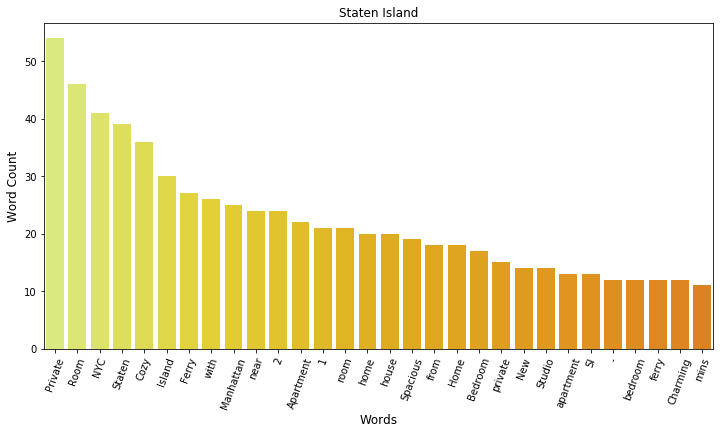

In [52]:
#Word Frequency for Staten Island Airbnb Listings
names=airbnb_SI['name'].fillna('No_name').ravel()
names_freq_SI = pd.DataFrame(pd.Series(" ".join(names).split()).value_counts(), columns=['Word Count'])
names_freq_SI.index.name='Words'
names_freq_SI.drop(droplist,axis=0,inplace=True)


names_freq30=names_freq_SI[:30]
plt.figure(figsize=(12, 6))
plt.title('Staten Island')
sns.barplot(x=names_freq30.index,y='Word Count', data=names_freq30,palette='Wistia').set_xticklabels(names_freq30.index, rotation=70,)
plt.rcParams["axes.labelsize"] = 12


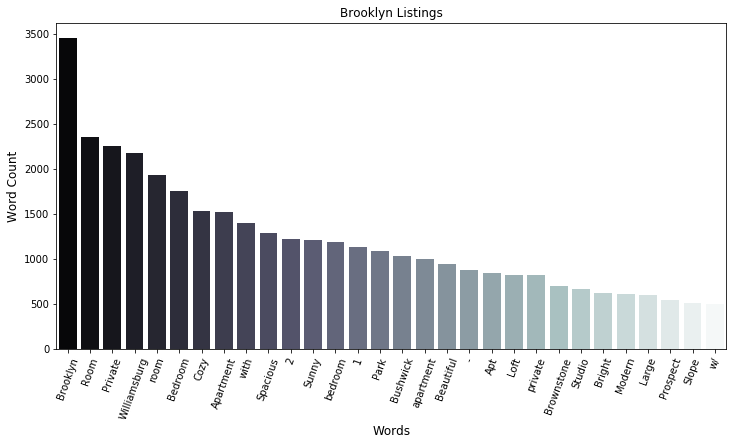

In [55]:
#Word Frequency for Brooklyn Airbnb Listings
names=airbnb_BK['name'].fillna('No_name').ravel()
names_freq_BK = pd.DataFrame(pd.Series(" ".join(names).split()).value_counts(), columns=['Word Count'])
names_freq_BK.index.name='Words'
names_freq_BK.drop(droplist,axis=0,inplace=True)

names_freq30=names_freq_BK[:30]
plt.figure(figsize=(12, 6))
plt.title('Brooklyn Listings')
sns.barplot(x=names_freq30.index,y='Word Count', data=names_freq30,palette='bone').set_xticklabels(names_freq30.index, rotation=70,)
plt.rcParams["axes.labelsize"] = 12


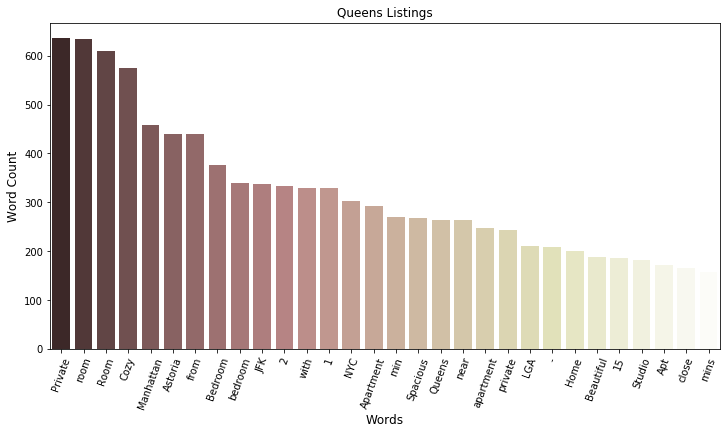

In [54]:
#Word Frequency for Queens Airbnb Listings
names=airbnb_QNS['name'].fillna('No_name').ravel()
names_freq_QNS = pd.DataFrame(pd.Series(" ".join(names).split()).value_counts(), columns=['Word Count'])
names_freq_QNS.index.name='Words'
names_freq_QNS.drop(droplist,axis=0,inplace=True)

names_freq30=names_freq_QNS[:30]
plt.figure(figsize=(12, 6))
plt.title('Queens Listings')
sns.barplot(x=names_freq30.index,y='Word Count', data=names_freq30,palette='pink').set_xticklabels(names_freq30.index, rotation=70,)
plt.rcParams["axes.labelsize"] = 12


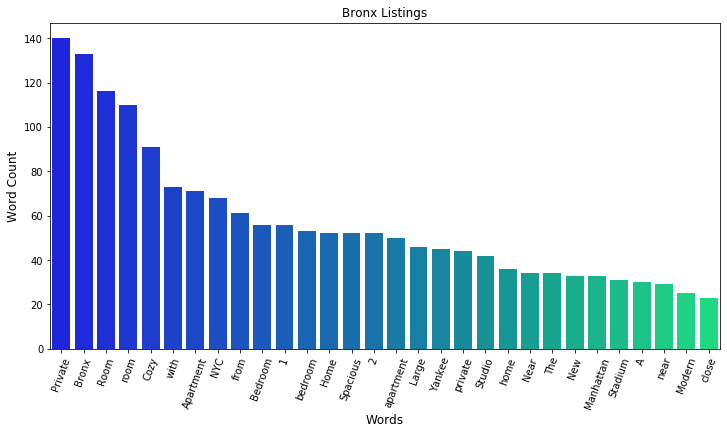

In [56]:
#Word Frequency for Bronx Airbnb Listings
names=airbnb_BX['name'].fillna('No_name').ravel()
names_freq_BX = pd.DataFrame(pd.Series(" ".join(names).split()).value_counts(), columns=['Word Count'])
names_freq_BX.index.name='Words'
names_freq_BX.drop(droplist,axis=0,inplace=True)

names_freq30=names_freq_BX[:30]
plt.figure(figsize=(12, 6))
plt.title('Bronx Listings')
sns.barplot(x=names_freq30.index,y='Word Count', data=names_freq30,palette='winter').set_xticklabels(names_freq30.index, rotation=70,)
plt.rcParams["axes.labelsize"] = 12


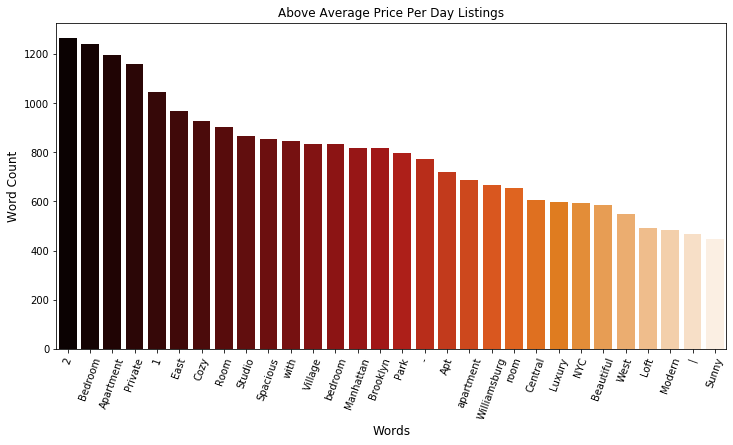

In [65]:
#Word Frequency for Above Average Price_per_day Airbnb Listings
names=airbnb_abvaverage['name'].fillna('No_name').ravel()
names_freq_abvaverage = pd.DataFrame(pd.Series(" ".join(names).split()).value_counts(), columns=['Word Count'])
names_freq_abvaverage.index.name='Words'
names_freq_abvaverage.drop(droplist,axis=0,inplace=True)

names_freq30=names_freq_abvaverage[:30]
plt.figure(figsize=(12, 6))
plt.title('Above Average Price Per Day Listings')
sns.barplot(x=names_freq30.index,y='Word Count', data=names_freq30,palette='gist_heat').set_xticklabels(names_freq30.index, rotation=70,)
plt.rcParams["axes.labelsize"] = 12

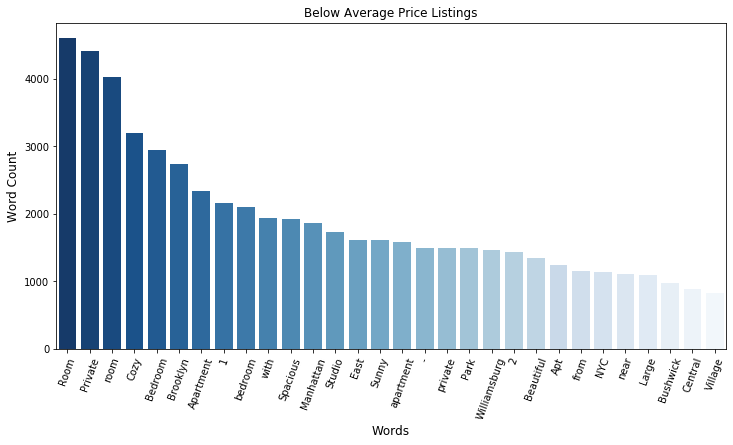

In [63]:
#Word Frequency for Below Average Price Airbnb Listings
names=airbnb_blwaverage['name'].fillna('No_name').ravel()
names_freq_blwaverage = pd.DataFrame(pd.Series(" ".join(names).split()).value_counts(), columns=['Word Count'])
names_freq_blwaverage.index.name='Words'
names_freq_blwaverage.drop(droplist,axis=0,inplace=True)

names_freq30=names_freq_blwaverage[:30]
plt.figure(figsize=(12, 6))
plt.title('Below Average Price Listings')
sns.barplot(x=names_freq30.index,y='Word Count', data=names_freq30,palette='Blues_r').set_xticklabels(names_freq30.index, rotation=70,)
plt.rcParams["axes.labelsize"] = 12

[Text(0, 0, 'Private'),
 Text(0, 0, 'Room'),
 Text(0, 0, 'Cozy'),
 Text(0, 0, 'room'),
 Text(0, 0, 'Bedroom'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, '2'),
 Text(0, 0, 'Apartment'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, 'with'),
 Text(0, 0, '-'),
 Text(0, 0, '1'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'Studio'),
 Text(0, 0, 'Spacious'),
 Text(0, 0, 'Park'),
 Text(0, 0, 'East'),
 Text(0, 0, 'NYC'),
 Text(0, 0, 'from'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'private'),
 Text(0, 0, 'Apt'),
 Text(0, 0, 'Central'),
 Text(0, 0, 'Beautiful'),
 Text(0, 0, 'Williamsburg'),
 Text(0, 0, 'near'),
 Text(0, 0, 'Sunny'),
 Text(0, 0, 'Modern'),
 Text(0, 0, 'Village'),
 Text(0, 0, 'Home')]

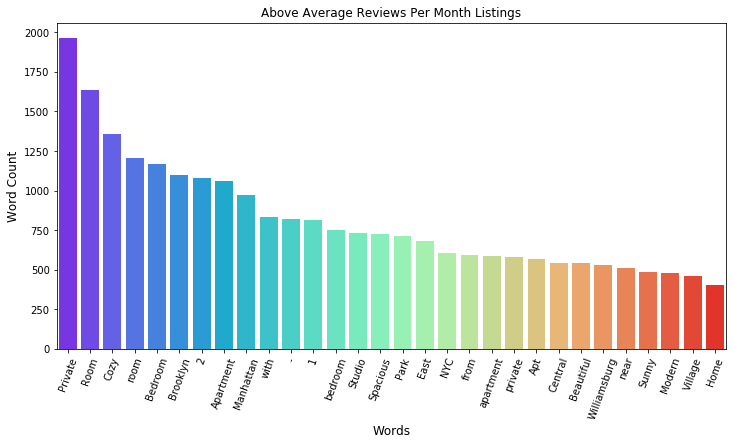

In [69]:
#Word Frequency for Above Average Reviews Per Month Airbnb Listings
names=airbnb_abvaverage_reviews['name'].fillna('No_name').ravel()
names_freq_abvaverage_reviews = pd.DataFrame(pd.Series(" ".join(names).split()).value_counts(), columns=['Word Count'])
names_freq_abvaverage_reviews.index.name='Words'
names_freq_abvaverage_reviews.drop(droplist,axis=0,inplace=True)

names_freq30=names_freq_abvaverage_reviews[:30]
plt.figure(figsize=(12, 6))
plt.title('Above Average Reviews Per Month Listings')
sns.barplot(x=names_freq30.index,y='Word Count', data=names_freq30,palette='rainbow').set_xticklabels(names_freq30.index, rotation=70,)


[Text(0, 0, 'Private'),
 Text(0, 0, 'Room'),
 Text(0, 0, 'Cozy'),
 Text(0, 0, 'room'),
 Text(0, 0, 'Bedroom'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, '2'),
 Text(0, 0, 'Apartment'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, '1'),
 Text(0, 0, '-'),
 Text(0, 0, 'with'),
 Text(0, 0, 'Spacious'),
 Text(0, 0, 'Park'),
 Text(0, 0, 'Studio'),
 Text(0, 0, 'East'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'Apt'),
 Text(0, 0, 'NYC'),
 Text(0, 0, 'Beautiful'),
 Text(0, 0, 'Sunny'),
 Text(0, 0, 'private'),
 Text(0, 0, 'Williamsburg'),
 Text(0, 0, 'Central'),
 Text(0, 0, 'from'),
 Text(0, 0, 'Village'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'near'),
 Text(0, 0, 'Modern'),
 Text(0, 0, 'Brownstone')]

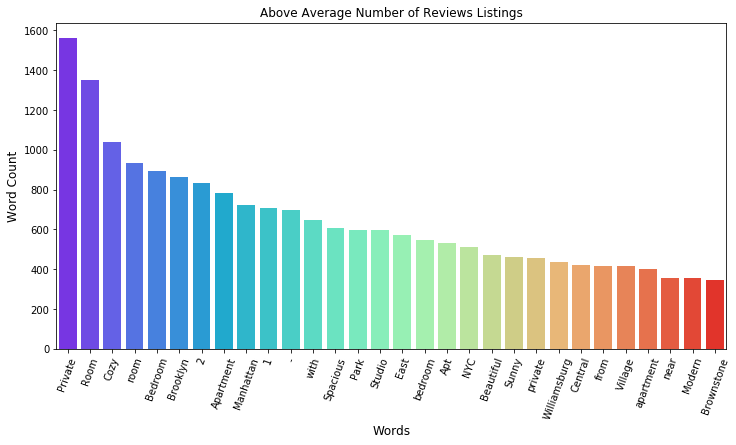

In [70]:
#Word Frequency for Above Average Number of Reviews Airbnb Listings
names=airbnb_abvaverage_nreviews['name'].fillna('No_name').ravel()
names_freq_abvaverage_nreviews = pd.DataFrame(pd.Series(" ".join(names).split()).value_counts(), columns=['Word Count'])
names_freq_abvaverage_nreviews.index.name='Words'
names_freq_abvaverage_nreviews.drop(droplist,axis=0,inplace=True)

names_freq30=names_freq_abvaverage_nreviews[:30]
plt.figure(figsize=(12, 6))
plt.title('Above Average Number of Reviews Listings')
sns.barplot(x=names_freq30.index,y='Word Count', data=names_freq30,palette='rainbow').set_xticklabels(names_freq30.index, rotation=70,)


Visualization for Most Frequent Host IDs found in Dataset

Host IDs
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
1475015       52
7503643       52
120762452     50
205031545     49
2856748       49
190921808     47
26377263      43
2119276       39
19303369      37
25237492      34
119669058     34
Name: host_id, dtype: int64

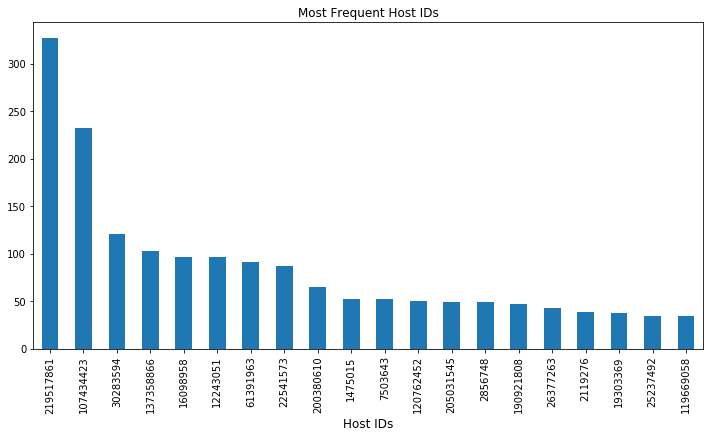

In [84]:

most_freq_host_ids = airbnb['host_id'].value_counts().head(20)
plt.figure(figsize=(12, 6))

plt.title('Most Frequent Host IDs')
most_freq_host_ids.index.name='Host IDs'
most_freq_host_ids.plot(kind='bar')


Descriptive Statistics for neighbouhood_group pricing

In [67]:
airbnb_describe = airbnb.groupby('neighbourhood_group')['price'].describe()
print(airbnb_describe.to_string() )

                       count        mean         std   min   25%    50%    75%      max
neighbourhood_group                                                                    
Bronx                 1090.0   87.577064  106.725371  10.0  45.0   65.0   99.0   2500.0
Brooklyn             20095.0  124.438915  186.896837  10.0  60.0   90.0  150.0  10000.0
Manhattan            21660.0  196.884903  291.386838  10.0  95.0  150.0  220.0  10000.0
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0  110.0  10000.0
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0  110.0   5000.0


Descriptive Statistics for neighbouhood_group pricing per day

In [68]:
airbnb_describe = airbnb.groupby('neighbourhood_group')['price_per_day'].describe()
print(airbnb_describe.to_string() )

                       count       mean         std       min   25%   50%    75%     max
neighbourhood_group                                                                     
Bronx                 1090.0  50.750127   72.222475  0.136986  19.5  35.0   60.0  1250.0
Brooklyn             20095.0  57.454499  130.995040  0.079079  19.0  39.0   69.0  8000.0
Manhattan            21660.0  86.949995  192.422524  0.040000  20.0  50.0  100.0  7703.0
Queens                5666.0  55.307232   66.641955  0.268000  21.0  42.5   70.0  2000.0
Staten Island          373.0  65.941963  264.668938  0.273973  20.0  39.5   65.0  5000.0


More Visualization and Analysis

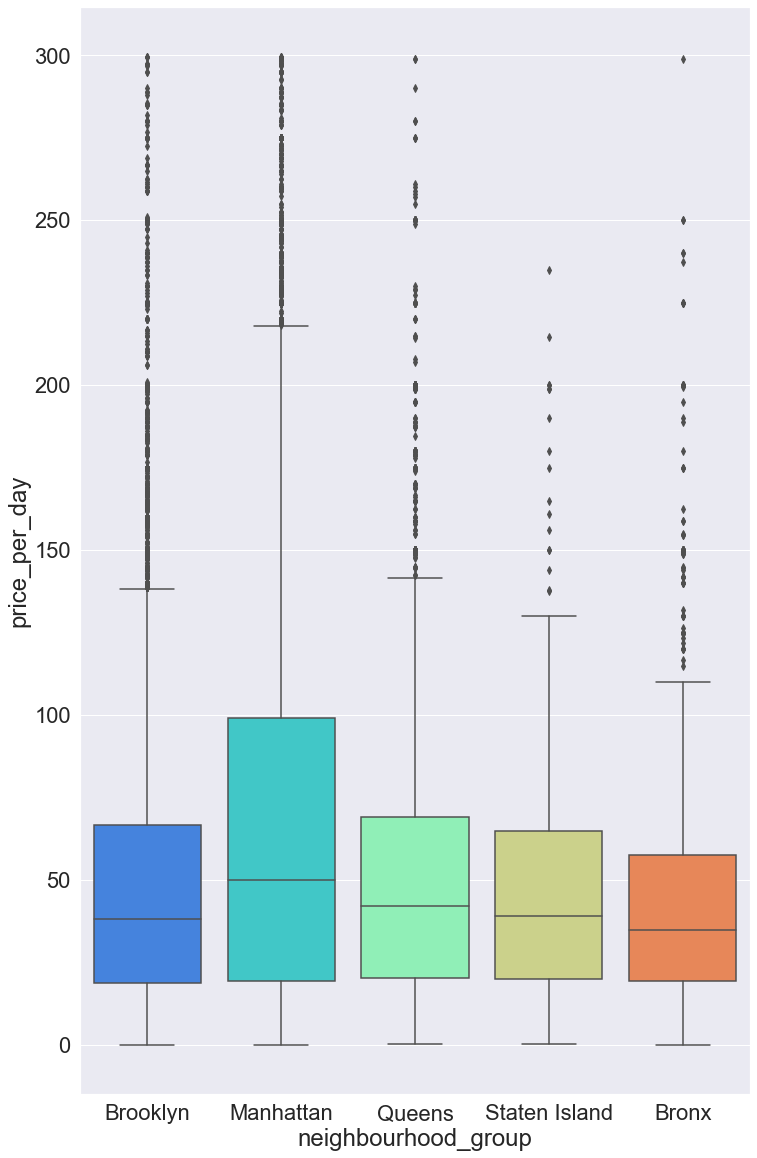

In [126]:
#As seen above in the Descriptive, there are some massive outliers
#to have a clearer visualization, we will set a cutoff point for the price so that majority of the datset can be visualized properly
plt.figure(figsize=(12, 20))
sns.boxplot(x='neighbourhood_group',y='price_per_day',data=airbnb[airbnb['price_per_day']<300],palette='rainbow')
sns.set(font_scale=2)

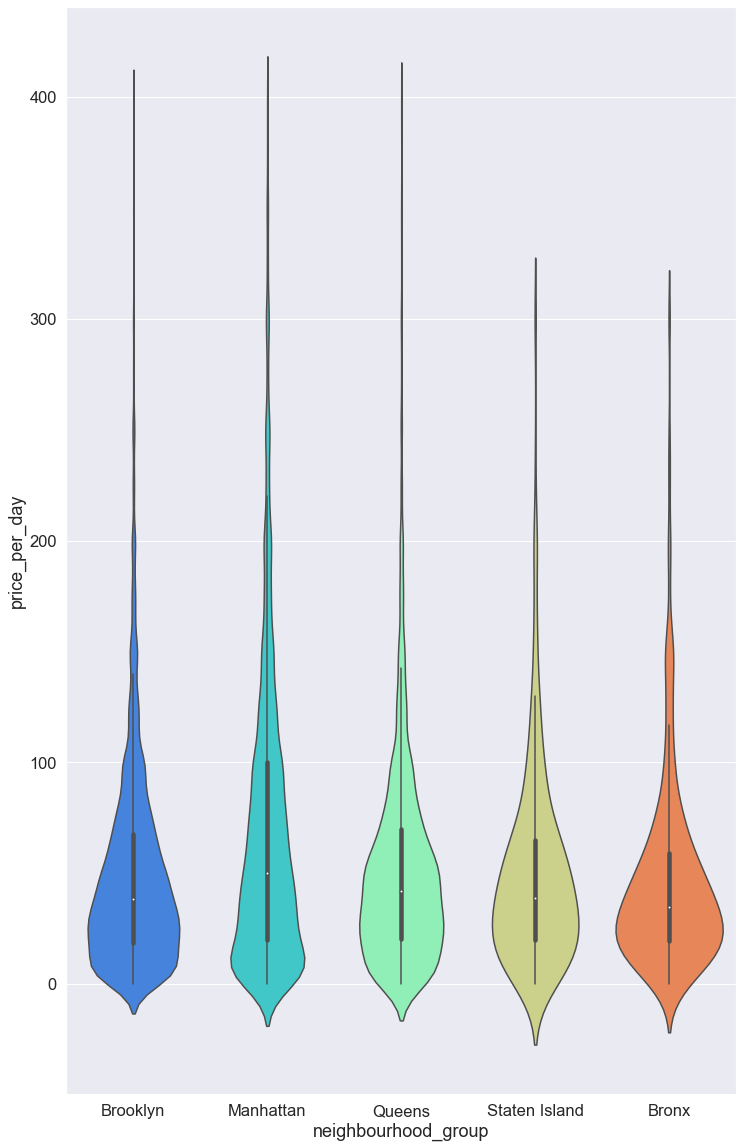

In [130]:
plt.figure(figsize=(12, 20))
sns.violinplot(x='neighbourhood_group',y='price_per_day',data=airbnb[airbnb['price_per_day']<400],palette='rainbow')
sns.set(font_scale=1.5)

Visualizing The most Frequent Host IDs found within the Dataset

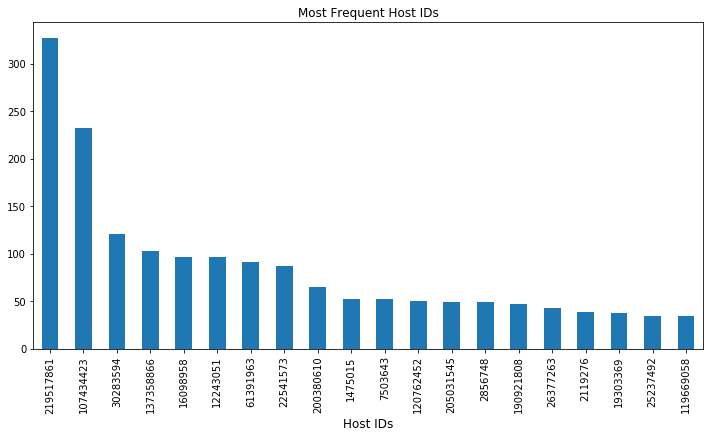

In [107]:
val=most_freq_host_ids.values
plt.figure(figsize=(12, 6))
plt.title('Most Frequent Host IDs')
sns.barplot(x=most_freq_host_ids.index,y=val, data=most_freq_host_ids,palette='rainbow').set_xticklabels(most_freq_host_ids.index, rotation=70,)
most_freq_host_ids.plot(kind='bar')

Visualization for room_type Frequency per neighbourhood_group

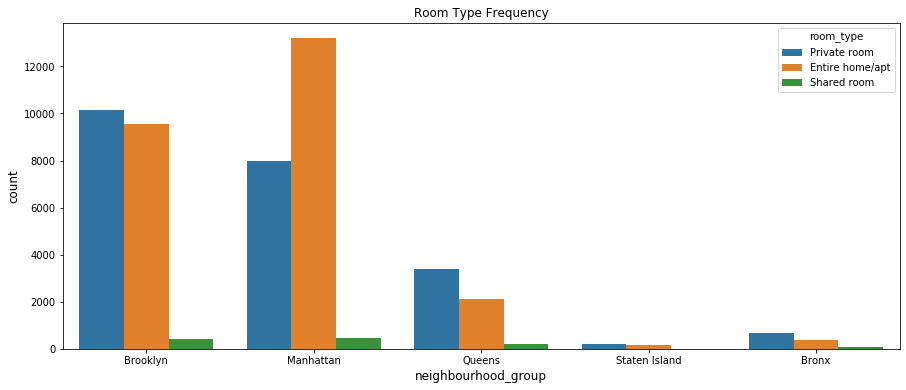

In [108]:
plt.figure(figsize=(15, 6))
plt.title('Room Type Frequency')
sns.countplot(x='neighbourhood_group', data=airbnb,hue='room_type')

Room Type Frequency Distribution for the Top 14 Neighbourhoods

In [98]:
rt=airbnb.groupby('room_type')['neighbourhood'].value_counts()
rt['Shared room'].head(10)
rt['Private room'].head(10)
rt['Entire home/apt'].head(10)
rt_df = pd.DataFrame()

rt_df=rt_df.append(rt['Shared room'].head(10))
rt_df.rename(index={'neighbourhood':'Shared room'},inplace=True)
rt_df=rt_df.append(rt['Private room'].head(10))
rt_df.rename(index={'neighbourhood':'Private room'},inplace=True)
rt_df=rt_df.append(rt['Entire home/apt'].head(10))
rt_df.rename(index={'neighbourhood':'Entire home/apt'},inplace=True)
rt_df=rt_df.T
rt_df

,Shared room,Private room,Entire home/apt
Bedford-Stuyvesant,85.0,2034.0,1591.0
Bushwick,66.0,1718.0,NaN
East Harlem,45.0,586.0,NaN
Harlem,49.0,1573.0,1036.0
Hell's Kitchen,99.0,672.0,1187.0
Lower East Side,38.0,NaN,NaN
Upper East Side,47.0,NaN,1310.0
Upper West Side,40.0,675.0,1256.0
Washington Heights,27.0,576.0,NaN
Williamsburg,32.0,1997.0,1890.0


[Text(0, 0.5, 'Top 14 Neighbourhoods'), Text(0.5, 0, 'Count')]

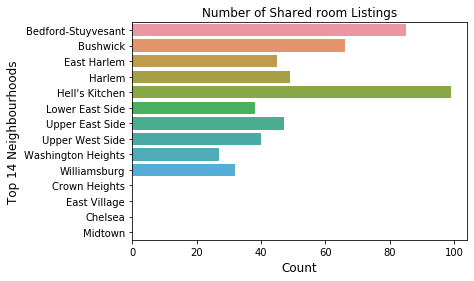

In [106]:
plt.title('Number of Shared room Listings')
bp=sns.barplot(x='Shared room', y=rt_df.index, data=rt_df)
bp.set(xlabel='Count', ylabel='Top 14 Neighbourhoods')

[Text(0, 0.5, 'Top 14 Neighbourhoods'), Text(0.5, 0, 'Count')]

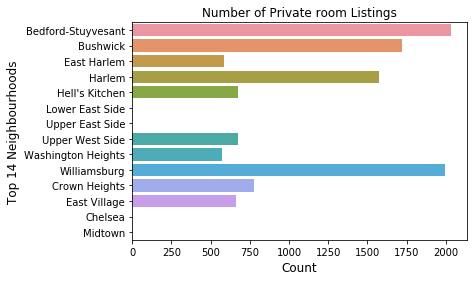

In [104]:
plt.title('Number of Private room Listings')
bp=sns.barplot(x='Private room', y=rt_df.index, data=rt_df)
bp.set(xlabel='Count', ylabel='Top 14 Neighbourhoods')

[Text(0, 0.5, 'Top 14 Neighbourhoods'), Text(0.5, 0, 'Count')]

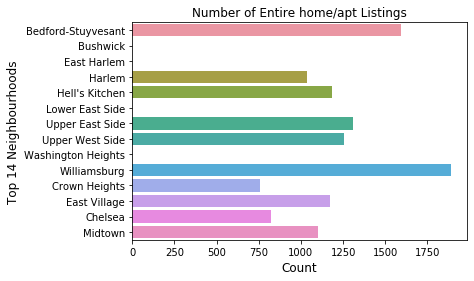

In [103]:
plt.title('Number of Entire home/apt Listings')
plt.xlabel('90')
bp=sns.barplot(x='Entire home/apt', y=rt_df.index, data=rt_df)
bp.set(xlabel='Count', ylabel='Top 14 Neighbourhoods')

Geographical Visualization of NYC based on Price per day

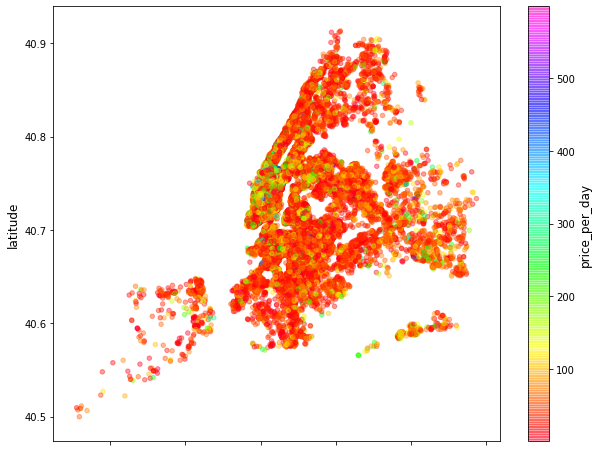

In [109]:
airbnb[airbnb['price']<600].plot(kind='scatter', x='longitude', y='latitude', c='price_per_day',cmap=plt.get_cmap('gist_rainbow'), colorbar=True, alpha=0.4, figsize=(10,8))
#Manhattan and Brooklyn are clearly the most populated. Mahattan also is more likely to have higher than average price listings as seen in the visualization.

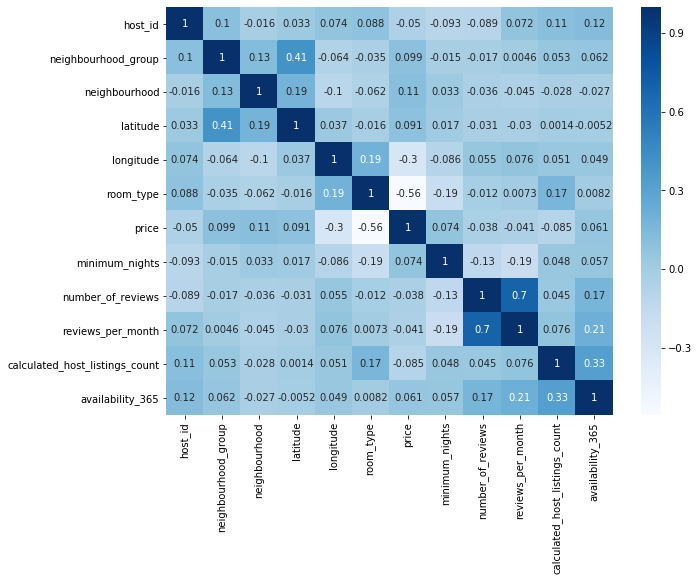

In [41]:
plt.figure(figsize=(10,7.5))
sns.heatmap(airbnb_machine.corr(method='kendall'), cmap='Blues',annot=True)

# Machine Learning


Label Encoding

In [6]:
#We are first going to label Encode the categoricals for ML
encoder = preprocessing.LabelEncoder()
encoded_neighbourhood = encoder.fit_transform(airbnb_machine['neighbourhood'])
encoded_neighbourhood_group = encoder.fit_transform(airbnb_machine['neighbourhood_group'])
encoded_room_type = encoder.fit_transform(airbnb_machine['room_type'])

#next we put the encoded features back into the dataset
airbnb_machine['neighbourhood'] = encoded_neighbourhood
airbnb_machine['neighbourhood_group'] = encoded_neighbourhood_group
airbnb_machine['room_type'] = encoded_room_type

Model Development

In [134]:
#originally we were going to use the keyword frequency information we collected and put it back into our model
#however do to time, this will be implemented in the second iteration of the Model we will develop
#so we are droping the column 'name' as a result for now
airbnb_machine.drop('name', axis=1, inplace=True)

#Next we set the variable we are going to predict, and the data we are using for the model
predict = 'price_per_day'
y = airbnb_machine[predict]
X = airbnb_machine.drop(['price','price_per_day'], axis=1)


## Training the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


#standardization
scaler=StandardScaler()
Xtrain_std=pd.DataFrame(scaler.fit_transform(X_train))

#Applying the Linear regresson model
linear = LinearRegression()
linear.fit(X_train,y_train)
print('Coefficients: \n', linear.coef_)

#Ridge Model
ridge = Ridge(alpha = 0.01, normalize = True)
ridge.fit(X_train, y_train)             


#Lasso Model
lasso= Lasso(alpha = 0.001, normalize =False)
lasso.fit(X_train, y_train)


#ElasticNet Model
elastic = ElasticNet(alpha = 0.01, normalize=False)
elastic.fit(X_train, y_train) 

#least Angle Regression
lars = Lars()
lars.fit(X_train, y_train)

#Support Vector Machine
#reg_SVR = svm.SVR()
#reg_SVR.fit(X_train, y_train)

#Linear Discriminant Analysis
#LDA = LinearDiscriminantAnalysis()
#LDA.fit(X_train, y_train)

#Quadratic Discriminant Analysis
#QDA = QuadraticDiscriminantAnalysis()
#QDA.fit(X_train, y_train)


#Logist Regression
#logR = LogisticRegression()
#logR.fit(X_train+, y_train+1)


Coefficients: 
 [ 9.04779020e-08  6.99238968e+00  2.11239519e-02  5.92662935e+01
 -2.86565669e+02 -3.54673323e+01 -8.99769278e-01 -9.34449650e-02
  1.44236524e+00 -2.83723089e-01  7.95812750e-02]


Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=500, normalize=True, positive=False, precompute='auto',
     verbose=False)

In [135]:
coeffecients = pd.DataFrame(linear.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values('Coeffecient', ascending=False)

,Coeffecient
latitude,5.926629e+01
neighbourhood_group,6.992390e+00
reviews_per_month,1.442365e+00
availability_365,7.958127e-02
neighbourhood,2.112395e-02
host_id,9.047790e-08
number_of_reviews,-9.344497e-02
calculated_host_listings_count,-2.837231e-01
minimum_nights,-8.997693e-01
room_type,-3.546733e+01


In [ ]:
#The coefficients above indicate that the most influential features for price per day are latitiude, neighbourhood_group, and reviews_per_month
airbnb_machine.head()

Visualizing Data Predictions

Text(0, 0.5, 'Predicted Y')

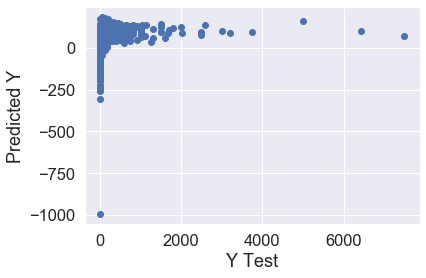

In [136]:
linear_predictions = linear.predict( X_test)
plt.scatter(y_test,linear_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

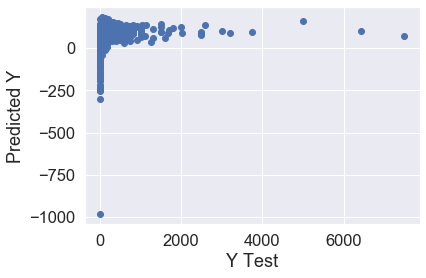

In [138]:
ridge_predictions = ridge.predict(X_test) 
plt.scatter(y_test,ridge_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

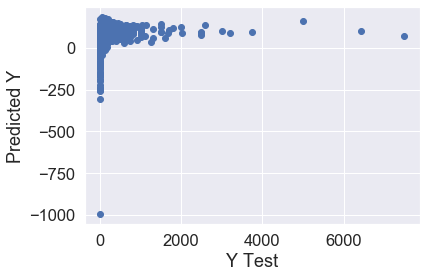

In [139]:
lasso_predictions = lasso.predict(X_test)
plt.scatter(y_test,lasso_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

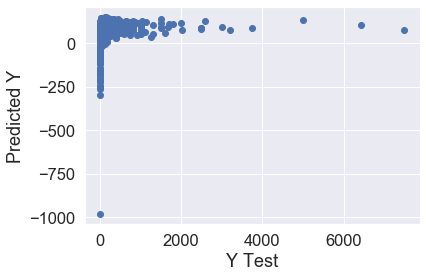

In [140]:
elastic_predictions= elastic.predict(X_test)
plt.scatter(y_test,elastic_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

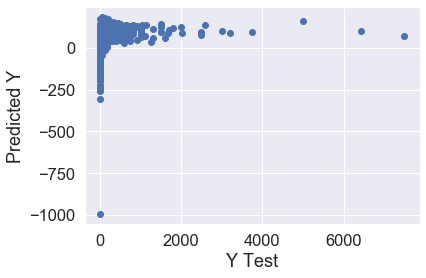

In [141]:
lars_predictions= lars.predict(X_test)
plt.scatter(y_test,lars_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Model Evaluation

In [142]:
acc=linear.score(X_test, y_test)
print('Linear Regression')
print('Score Accuracy:', acc)
print('MAE:', metrics.mean_absolute_error(y_test, linear_predictions))
print('MSE:', metrics.mean_squared_error(y_test, linear_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linear_predictions)))
print(' ')
print('Ridge Regression')
acc2=ridge.score(X_test, y_test)
print('Score Accuracy:', acc2)
print('MAE:', metrics.mean_absolute_error(y_test, ridge_predictions))
print('MSE:', metrics.mean_squared_error(y_test, ridge_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_predictions)))
print(' ')
print('Lasso')
acc3=lasso.score(X_test, y_test)
print('Score Accuracy:', acc3)
print('MAE:', metrics.mean_absolute_error(y_test, lasso_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lasso_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_predictions)))
print(' ')
print('Elastic-Net')
acc4=elastic.score(X_test, y_test)
print('Score Accuracy:', acc4)
print('MAE:', metrics.mean_absolute_error(y_test, elastic_predictions))
print('MSE:', metrics.mean_squared_error(y_test, elastic_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_predictions)))
print(' ')
print('Least Angle Regression')
acc5=lars.score(X_test, y_test)
print('Score Accuracy:', acc5)
print('MAE:', metrics.mean_absolute_error(y_test, lars_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lars_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lars_predictions)))


Linear Regression
Score Accuracy: 0.047089886978461726
MAE: 50.992564942006915
MSE: 19797.355670454395
RMSE: 140.70307626507102
 
Ridge Regression
Score Accuracy: 0.047085442971339764
MAE: 50.971137267420346
MSE: 19797.447997724714
RMSE: 140.70340435726746
 
Lasso
Score Accuracy: 0.04709296830010867
MAE: 50.99082786982577
MSE: 19797.29165390158
RMSE: 140.70284877678057
 
Elastic-Net
Score Accuracy: 0.04335154557895038
MAE: 51.145001783884155
MSE: 19875.02225546842
RMSE: 140.9788007307071
 
Least Angle Regression
Score Accuracy: 0.04708988697845984
MAE: 50.992564942009295
MSE: 19797.355670454435
RMSE: 140.70307626507116


# Conclusion

Feature selection may need to be significantly redefined. Currently none of the selected ML models are capable of acheiving an accuracy above 5%. More Analysis may be needed to help achieve more optimal results. The inclusion of the weighting of specific keywords by way of a function may also prove beneficial, as seen through the visualizations of words in correlation to ranges above and below the average price.